# Drought Prediction Capstone Project

___

# Introduction

### Problem Statement: 

All around the world wildfires are damaging the lives and property of many people. Due to a multitude of factors such as drought, bark-beetle infestation, bad fire management practices, increases in outdoor recreation, degrading energy infrastructure, and much more, the western United States is now host to catastrophic wildfires that haven’t been witnessed in recorded history. Unfortunately, climate scientists warn that this is the “new normal”. 

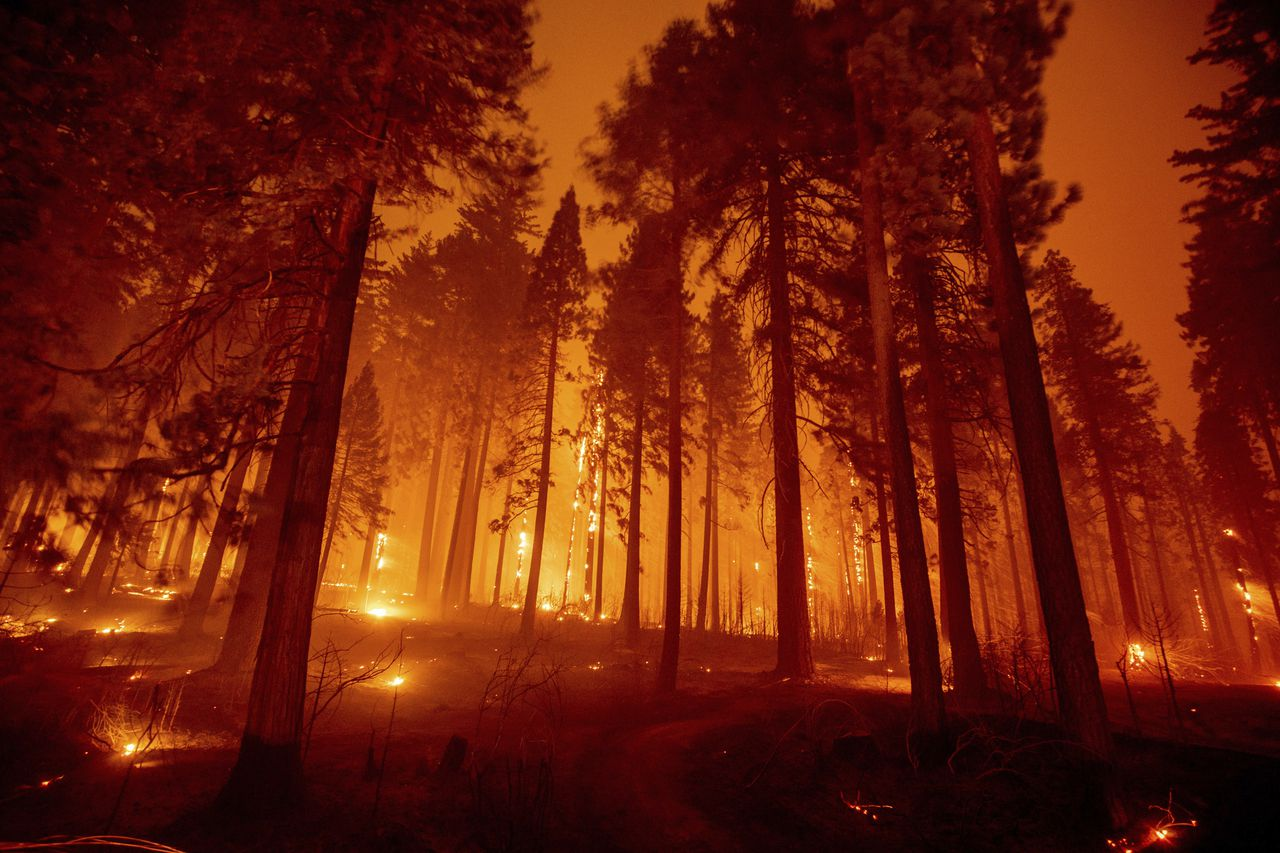

Being able to predict wildfire risk could be extremely helpful for communities, businesses, fire management crews, and many others to help plan and prepare as we continue into the future. One part of the equation in preparing for wildfires is being able to predict future drought levels. **The aim of this project is to predict the drought level of a given county 1 month into the future.**


### Stakeholders:

Though there are a large number of people and organizations who would benefit greatly from such a predictive model, this project was conducted with fire management crews in mind. This information could prove invaluable for wildfire fighting preparations. Being able to quickly fight a growing fire is essential, and having an idea of the most at risk areas could make all the difference in succesfully fighting a fire. **More specifically, a model such as this could be used by fire management crews for staffing forecasting and fire advisory/restriction implementation.**


### Criteria for Success:

This project can be considered a success if the model is able to correctly identify 75% or more of the high drought counties in the dataset. 



___

# Data

### Meteorological Timeseries Data

This dataset includes data from the NASA Langley Research Center (LaRC) POWER Project which is funded through the NASA Earth Science/Applied Science Program. The meteorological timeseries dataset was compiled by Christoph Minixhofer and uploaded to Kaggle. 

**The features in the dataset are listed below:**

-	FIPS Code (County)
-	Observation Date
-	Precipitation (mm day-1)
-	Surface Pressure (kPa)
-	Specific Humidity at 2 Meters (g/kg)
-	Temperature at 2 Meters (C)
-	Dew/Frost Point at 2 Meters (C)
-	Wet Bulb Temperature at 2 Meters (C)
-	Max Temperature at 2 Meters (C)
-	Minimum Temperature at 2 Meters (C)
-	Temperature Range at 2 Meters (C)
-	Earth Skin Temperature (C)
-	Wind Speed at 10 Meters (m/s)
-	Maximum Wind Speed at 10 Meters (m/s)
-	Minimum Wind Speed at 10 Meters (m/s)
-	Wind Speed Range at 10 Meters (m/s)
-	Wind Speed at 50 Meters (m/s)
-	Maximum Wind Speed at 50 Meters (m/s)
-	Minimum Wind Speed at 50 Meters (m/s)
-	Wind Speed Range at 50 Meters (m/s)

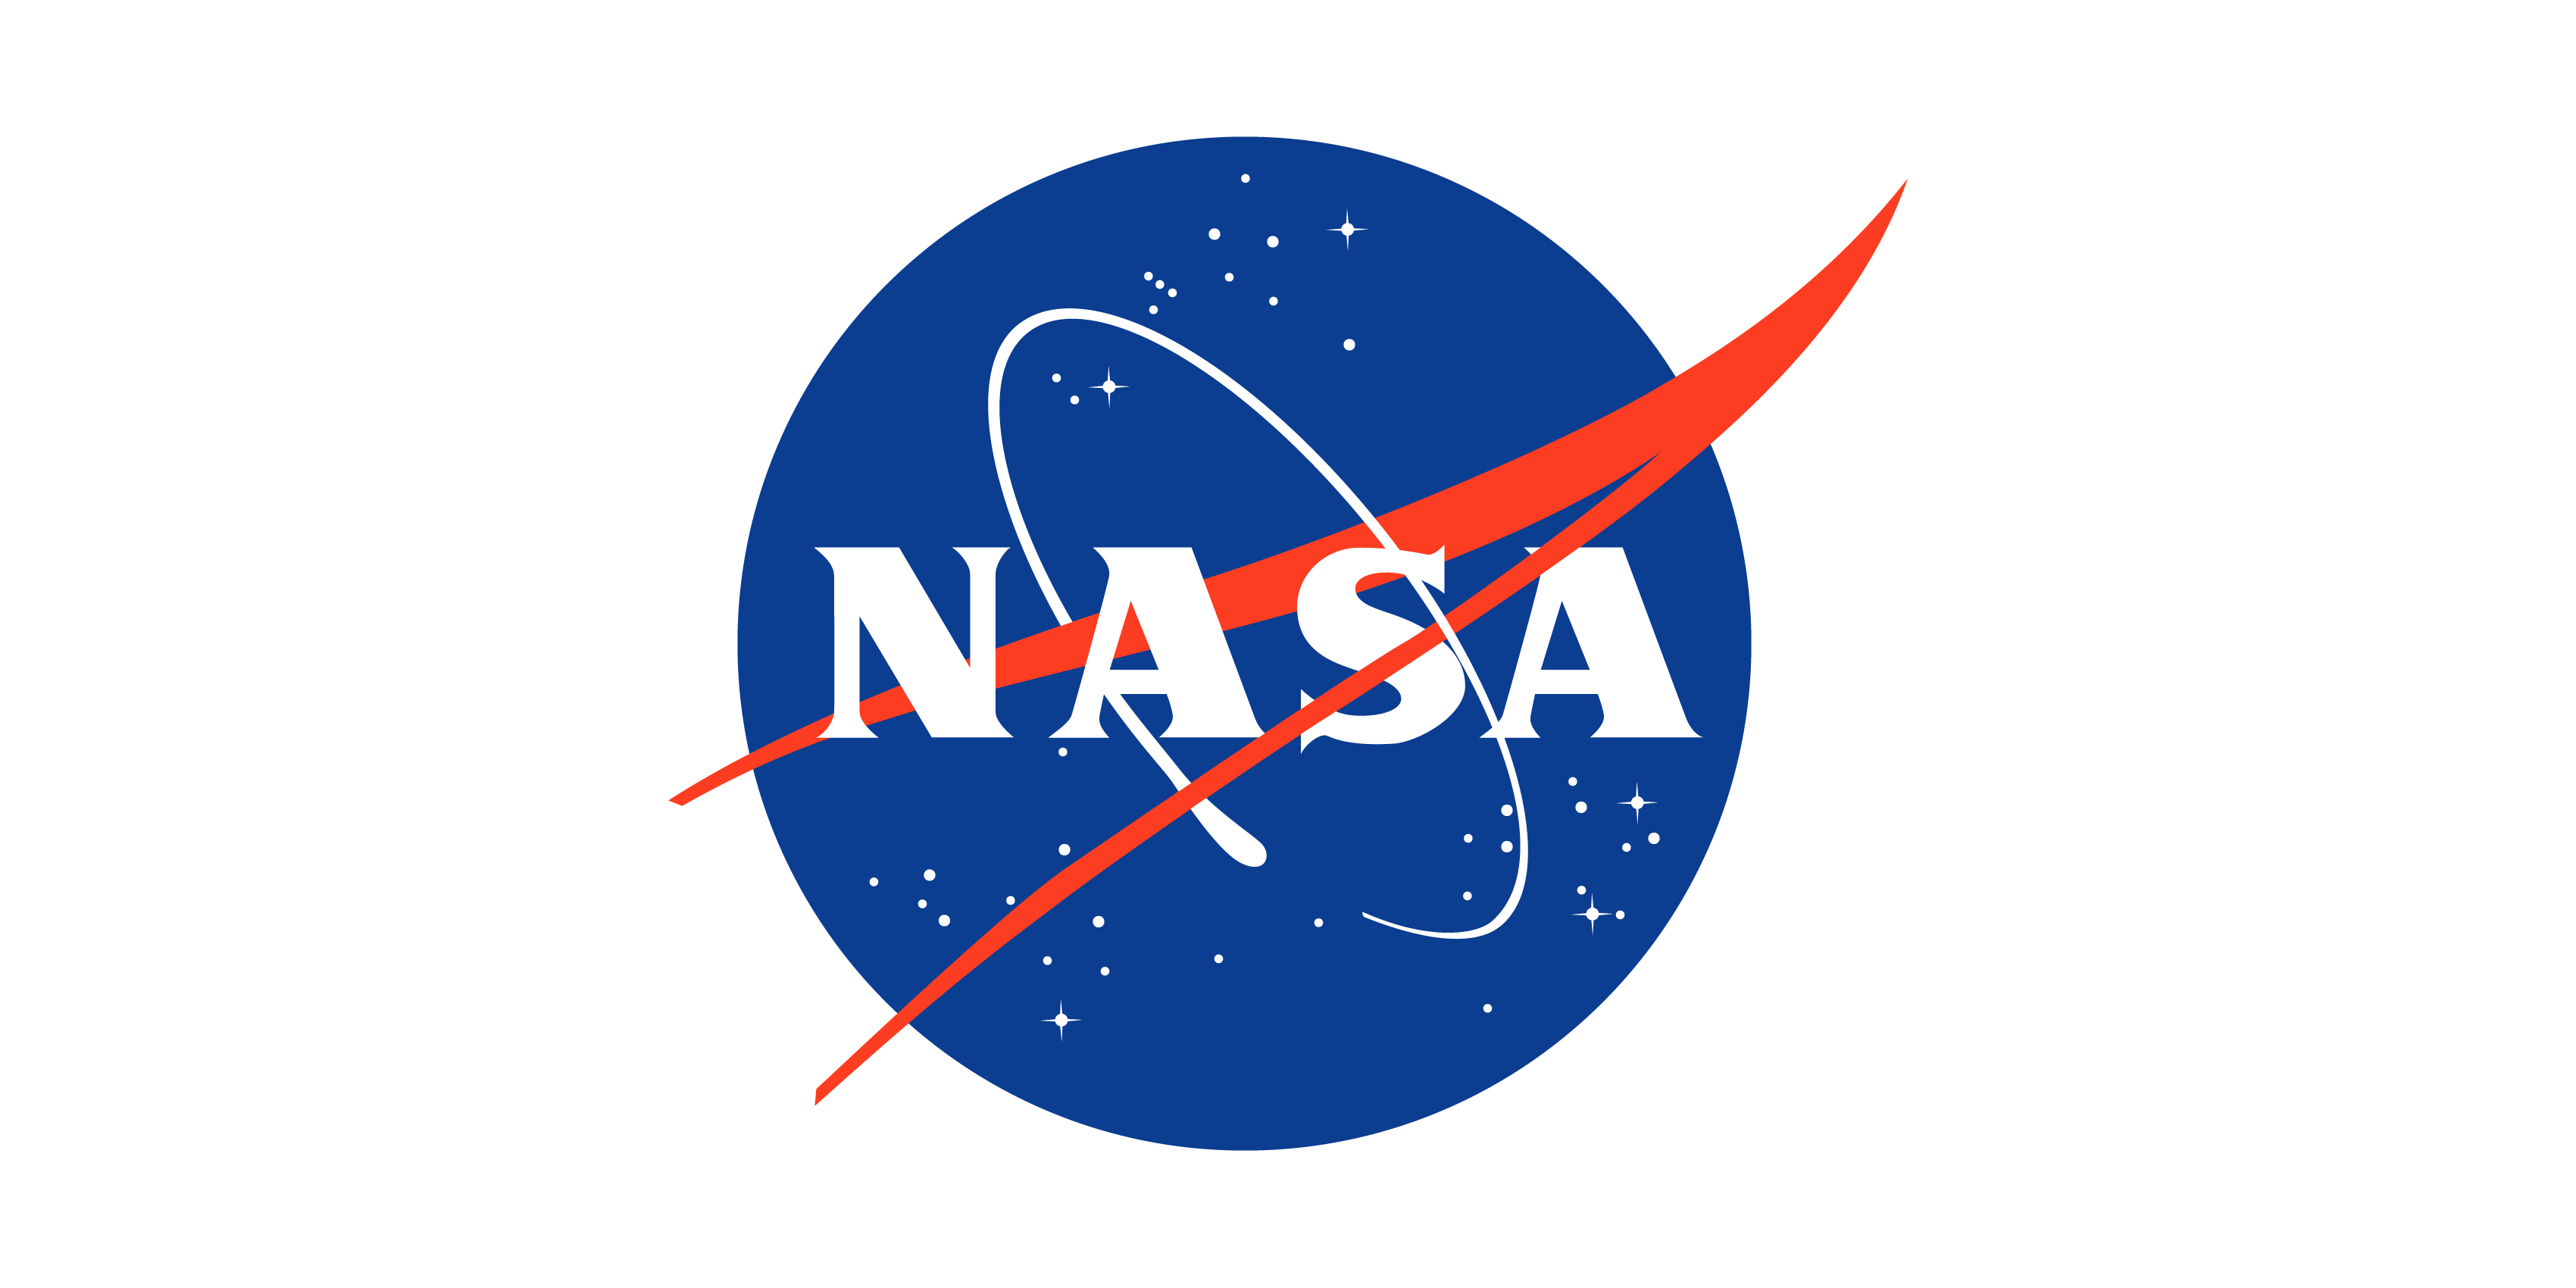




### US Drought Monitor Data (Target Feature)

The US Drought Monitor collects drought scores for counties throughout the US on a scale from No Drought - D4. In the dataset these values are floating point values ranging from 0-5, 0 corresponding to No Drought and 5 corresponding to D4. These values are the county (FIPS Code) average and are collected weekly. It is more sensible for this project to be approached as a classification problem, and so these floating point values will be rounded to the nearest whole number. The drought score dataset was compiled by Christoph Minixhofer and uploaded to Kaggle. 

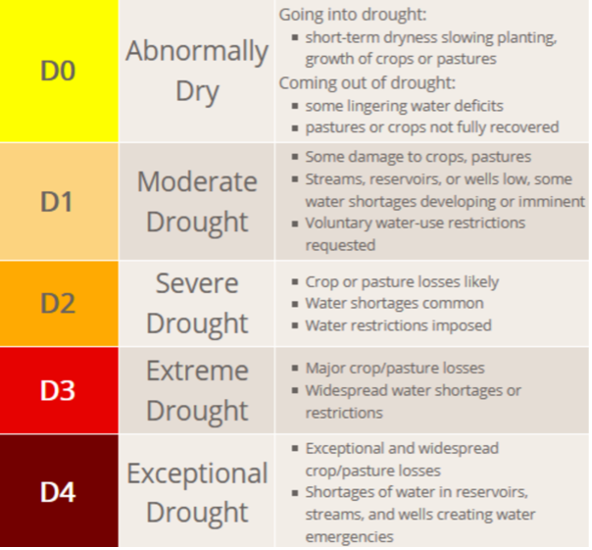

### Soil Data

The features in the soil dataset are from the Harmonized World Soil Database, which contains data generated by the NASA Shuttle Radar Topographic Mission (SRTM). This includes digital elevation data (DEMs) for over 80% of the globe with 3 arc second (approximately 90 meter) resolution at the equator. This soil datset was compiled by Christoph Minixhofer and uploaded to Kaggle. 

The terrain slopes of a given county (FIPS code) are included as a percentage of the entire area that each slope category represents. The slope categories add up to a value of 1 (100%). Similarly, slope aspects for a given county are included and add up to a value of 1 (100%). Other features represent land and soil characteristics.

-	Elevation
-	0% ≤ slope ≤ 0.5%
-	0.5% ≤ slope ≤ 2%
-	2% ≤ slope ≤ 5%
-	5% ≤ slope ≤10%
-	10% ≤ slope ≤15%
-	15% ≤ slope ≤ 30%
-	30% ≤ slope ≤ 45%
-	Slope > 45%
-	North Aspect
-	East Aspect
-	South Aspect
-	West Aspect
-	Unknown Aspect
-	Mapped Water Bodies
-	Sparsely Vegetated Land
-	Built-up Land
-	Grass/Scrub/Woodland
-	Forest Land
-	Rain-fed Cultivated Land
-	Irrigated Cultivated Land
-	Total Cultivated Land
-	Nutrient Availability
-	Nutrient Retention Capacity
-	Rooting Conditions
-	Oxygen Availability to Roots
-	Excess Salts
-	Toxicity
-	Workability

___

# Methods

This problem was initially approached as a time series problem. The data goes back 20 years and contains numerous features, some of which have different time frequencies (daily, weekly, and some with no time series aspect at all). Time series problems can be quite tricky, especially with the features that are in this particular data, so in order to simplify the problem I decided to turn it into a multi-class classification problem. After further consideration and poor model performance, **I decided to simplify the problem even further during the modeling stage of the project by turning it into a binary classification problem, splitting the target feature "drought score" into two categories: _Low Drought (No Drought, D0, D1) and High Drought (D2, D3, D4)._** Simplifying the model in this way produced a more reliable model that was far more practical.

The full dataset included millions of daily entries for thousands of individual counties in the United States. **A smaller subset of this data was created that focused on the West Coast States (California, Oregon, and Washington)**. These particular states were selected as they have experienced the most destructive wildfires over the past decade. 




___

# Data Cleaning

The data cleaning and preparation was by far the most complex stage of this project, as it required a great deal of feature engineering and involved data with different collection frequencies. I needed to preserve the time series information by aggregating the sum and averages of certain meteorological features. I developed functions that would create new datasets with the desired features for each county (FIPS Code) and then combine them into one large dataset. _This methodology was applied to create a West Coast dataset (California, Oregon, and Washington) and a Full dataset (entire United States)._

**The developed functions performed the following operations:**

- **Aggregated the sums and averages of the daily meteorological features**
- **Extracted the month from the date of each entry**
- **Dropped all NaN values, to make the time frequency of the data uniform (weekly)**
- **Rounded the drought scores to change from floating point numbers to integers**
- **Created new features that showed the previous and following month's drought scores**
- **Combined county datasets into one large dataset**

After these datasets were compiled I added the corresponding soil data for each county. 

**By the end of this process the final datasets had 56 features. The full training dataset had 3,014,760 entries and the west coast training dataset had 129,010 entries.**




```python
def sum_func(df, col):
    '''
    Aggregates the rolling sum of a column and creates a new column for
    the aggregated data. Intended for precipitation calculations.
    
    '''
    df[f'{col}_7d_sum'] = df[col].rolling(window = 7).sum().round(2)
    
    df[f'{col}_30d_sum'] = df[col].rolling(window = 30).sum().round(2)
    
    df[f'{col}_90d_sum'] = df[col].rolling(window = 90).sum().round(2)

    
def avg_func(df, col):
    
    '''
    Aggregates the rolling average of a column and creates a new column for
    the aggregated data. Intended for non-precipitation calculations.
    '''
    
    df[f'{col}_7d_avg'] = df[col].rolling(window = 7).mean().round(2)
    
    df[f'{col}_30d_avg'] = df[col].rolling(window = 30).mean().round(2)
    
    

```python
def create_dataframe(df, fips_id):
    
    '''
    Creates a dataframe for a single fips code (county) from the input dataframe. 
    Utilizes previously defined sum_func and avg_func and removes most non-aggregated 
    features. Removes NaN values that were introduced from the rolling sum and rolling
    average functions. Rounds the drought score feature to make it a categorical
    feature and then creates new 'month_ago' and 'month_ahead' features.
    
    '''
    
    #Creating the dataframe
    fips_df = df[df['fips'].isin([fips_id])]
    
    #Making the dataframe multi-index
    fips_df.set_index(['fips', 'date'], inplace = True)
    
    #Creating lists to iterate over
    sum_cols = ['precip']
    avg_cols = ['surface_pressure', 'specific_humidity','temp_2m_min', 'temp_2m_max', 
                'dewpoint_2m', 'earthskin_temp', 'wind_10m', 'wind_50m']
    
    #Aggregating new columns 
    for col in sum_cols:
        sum_func(fips_df, f'{col}')
    
    for col in avg_cols:
        avg_func(fips_df, f'{col}')
    
    #Reseting the index now that columns have been aggregated to select for relevant columns
    fips_df.reset_index(inplace = True)

    #Converting to datetime object
    fips_df['date'] = fips_df['date'].astype('datetime64[ns]')

    #Adding month column
    fips_df['month'] = fips_df['date'].dt.month
    
    #Selecting for desired features in dataframe
    fips_df = fips_df[['fips','date', 'month', 'score', 'precip_7d_sum', 'precip_30d_sum', 'precip_90d_sum',
                       'surface_pressure_7d_avg', 'surface_pressure_30d_avg', 'specific_humidity_7d_avg', 
                       'specific_humidity_30d_avg','temp_2m_min_7d_avg', 'temp_2m_min_30d_avg',
                       'temp_2m_max_7d_avg','temp_2m_max_30d_avg', 'dewpoint_2m_7d_avg', 
                       'dewpoint_2m_30d_avg','earthskin_temp_7d_avg', 'earthskin_temp_30d_avg',
                       'wind_10m_7d_avg','wind_10m_30d_avg', 'wind_50m_7d_avg', 'wind_50m_30d_avg']]
    
    #Removing rows that are before 2000-04-01 since first 90 days of data will have NaN values for 
    #precip_90d_sum
    fips_df = fips_df[~(fips_df['date'] < '2000-04-01')]

    #Dropping all NaN values to show only weekly data now that all other columns have been aggregated
    fips_df = fips_df.dropna()
    
    #Rounding score
    fips_df['rounded_score'] = fips_df['score'].round()

    #Selecting for previous and future month drought score
    fips_df['month_ago_score'] = fips_df['rounded_score'].shift(periods = 4)
    fips_df['month_ahead_score'] = fips_df['rounded_score'].shift(periods = -4)
    
    #Selecting/ordering desired features in dataframe with new columns added
    fips_df = fips_df[['fips', 'date', 'month','month_ahead_score','rounded_score', 'month_ago_score',
                       'precip_7d_sum', 'precip_30d_sum', 'precip_90d_sum','surface_pressure_7d_avg', 
                       'surface_pressure_30d_avg','specific_humidity_7d_avg', 'specific_humidity_30d_avg',
                       'temp_2m_min_7d_avg', 'temp_2m_min_30d_avg','temp_2m_max_7d_avg',
                       'temp_2m_max_30d_avg', 'dewpoint_2m_7d_avg', 'dewpoint_2m_30d_avg',
                       'earthskin_temp_7d_avg', 'earthskin_temp_30d_avg','wind_10m_7d_avg',
                       'wind_10m_30d_avg', 'wind_50m_7d_avg', 'wind_50m_30d_avg']]  
    
    #Dropping NaN values
    fips_df.dropna(inplace = True)
    
    return fips_df


def create_compile_dataframes(df, fips_list):
    
    '''
    Creates and combines the dataframes of multiple counties into one dataframe, utilizing 
    the previously defined 'create_dataframe function' and a list of fips codes (counties) 
    to be concatenated.
    
    '''
    
    #Instantiating empty dictionary
    test_dict = {}
    
    #Looping through fips code list and creating dataframe
    for county in fips_list:
        test_dict[county] = create_dataframe(df, int(county))
        
    #Combining dataframes    
    return pd.concat(test_dict.values(), ignore_index = True)
```

___

# Exploratory Data Analysis

## Recursive Feature Elimination

Recursive Feature Elimination was used to determine the most important features for predicting the target feature, 'month_ahead_score' and remove all unnecessary features.

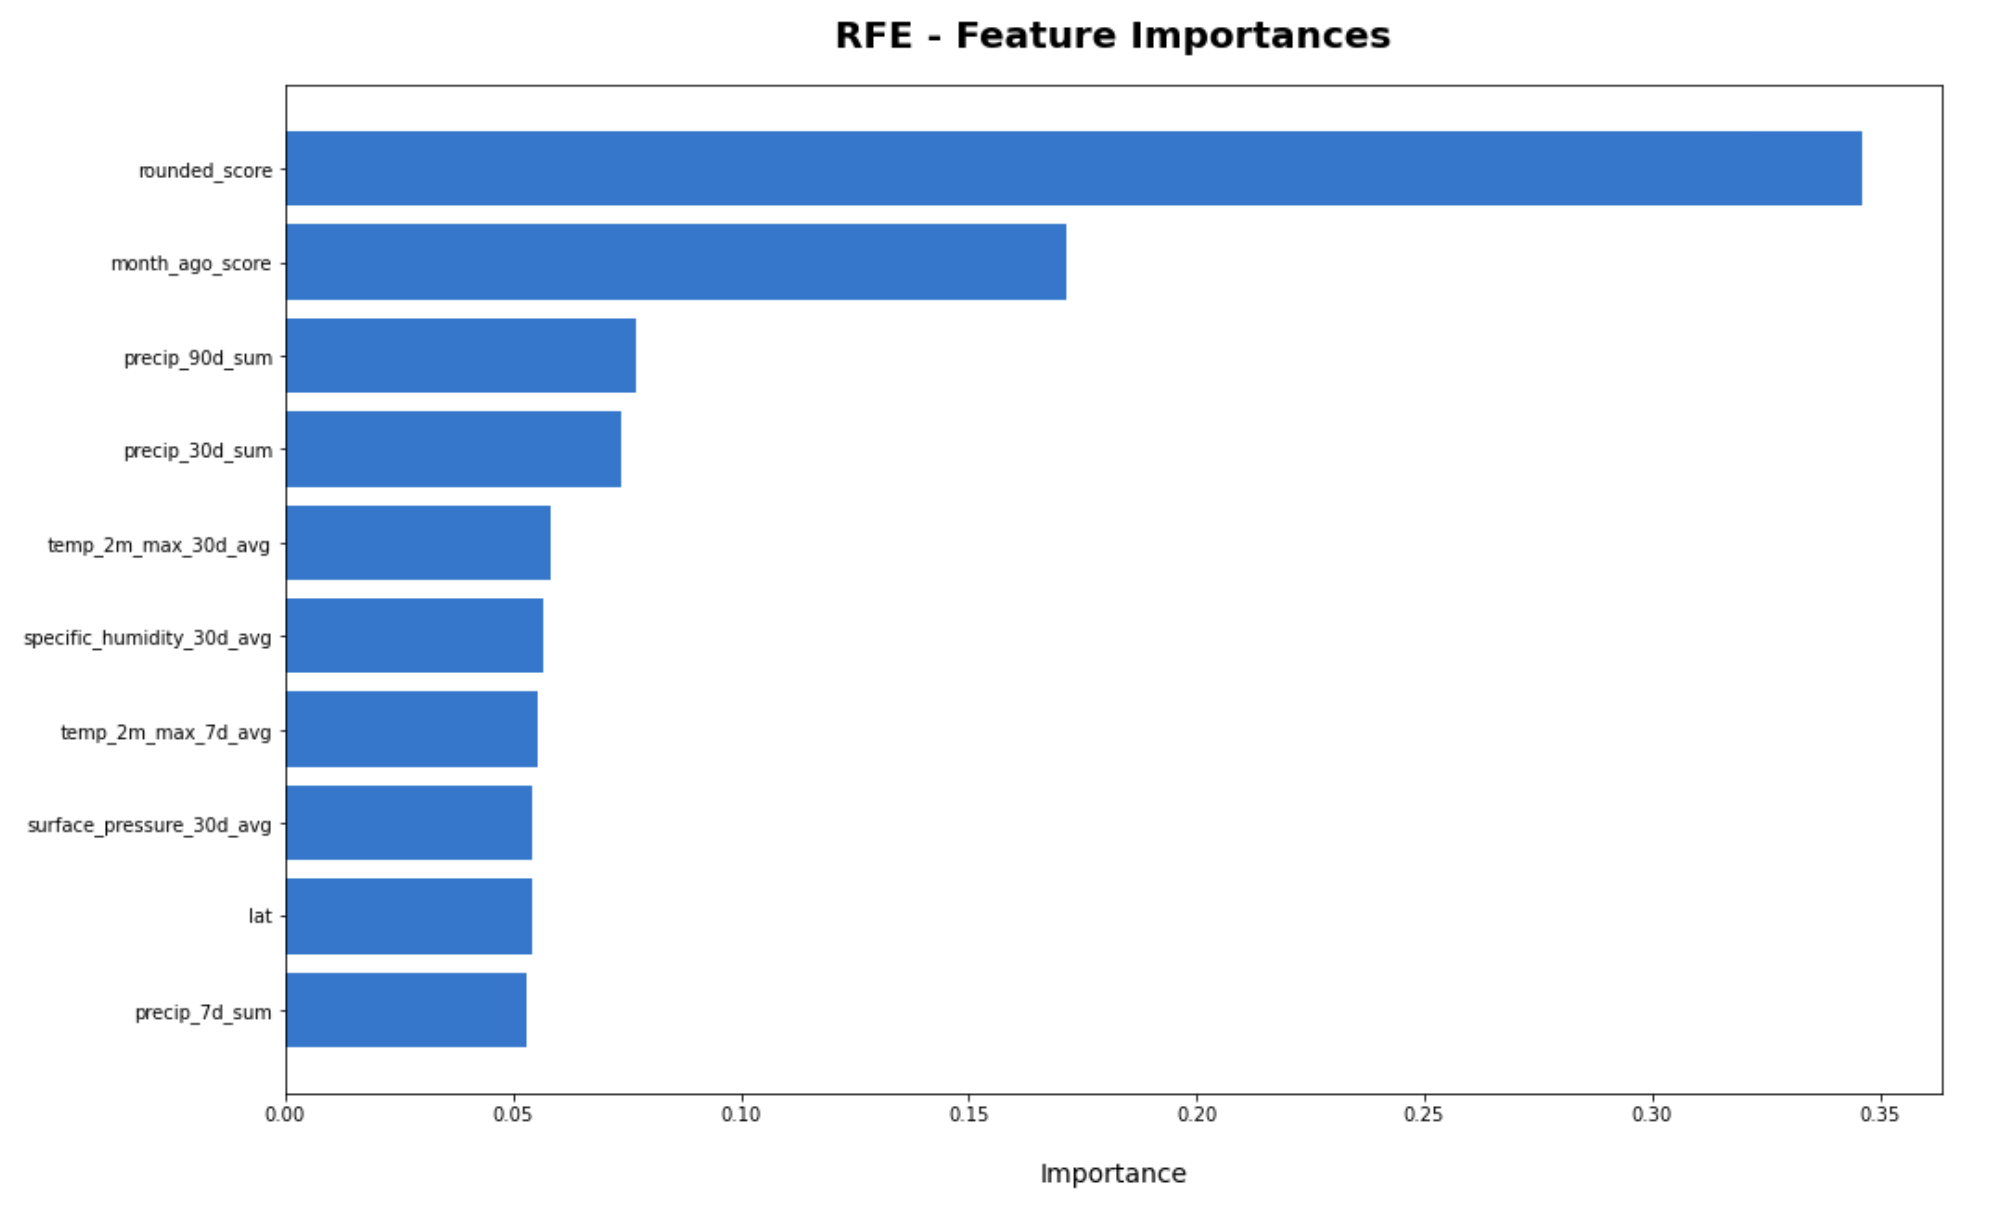

From this visualization of feature importances in the RFE model, we can see that the current drought score, the score 1 month ago, and the precipitation sums are the most important features in predicting 'month_ahead_score'. I decided to include all of these features in the final dataset, greatly reducing the number of features from 56 to 10. 

## Visualizations

For this section I will display the histograms of the three most important features according the the RFE model: 

- Drought Score
- Previous Month's Drought Score
- 90 Day Precipitation Sum

#### Drought Score

This visualization shows the distribution of drought scores in the West Coast training dataset.

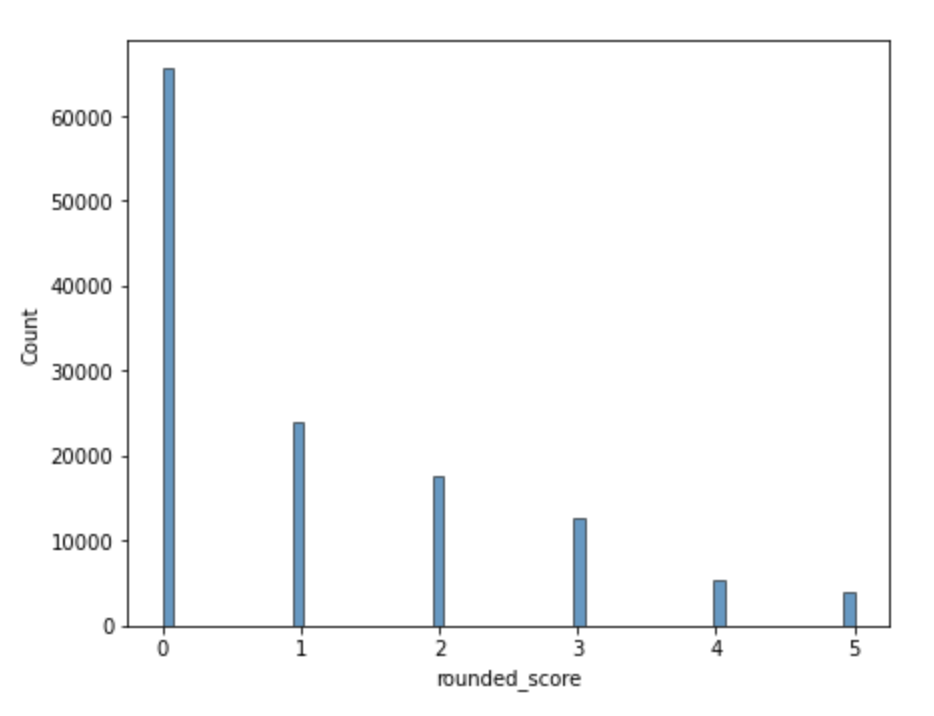

#### Previous Month Drought Scores

This visualization shows the previous month's drought scores in the West Coast training dataset.



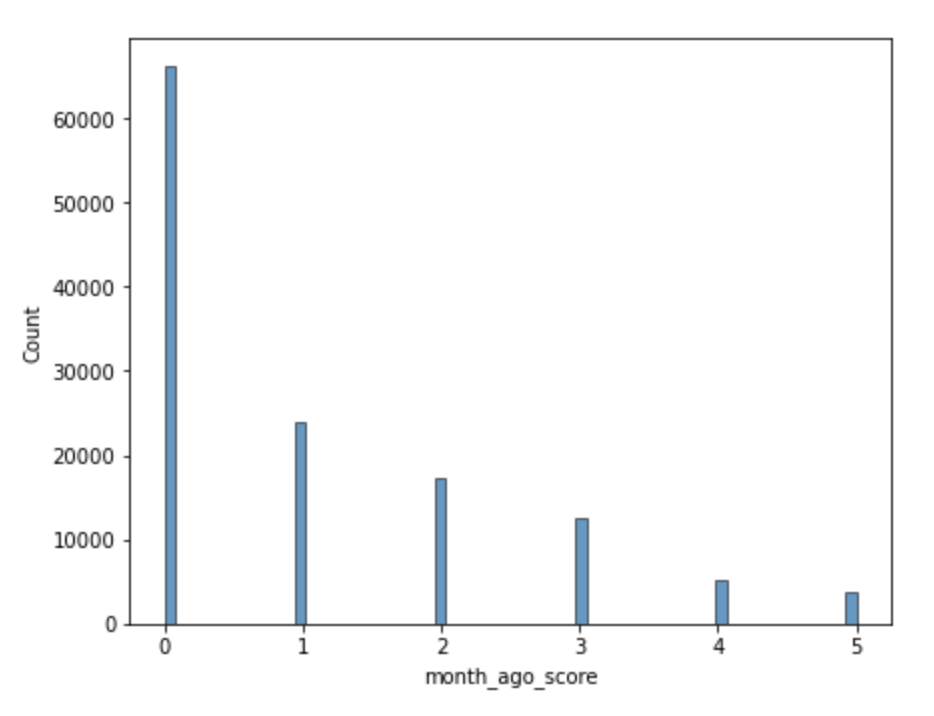

#### 90 Day Precipitation Sum

This visualization shows the sum of the previous 90 days of precipitation in the West Coast training dataset.


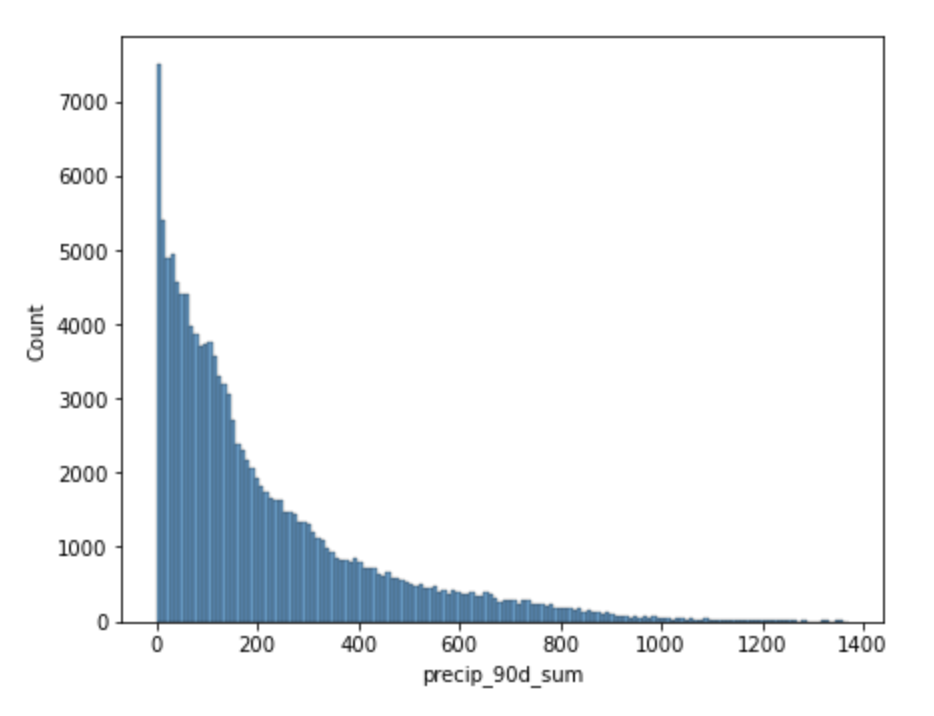

____

# Modeling

## Converting Target Feature to Binary

Before beginning the modeling process I changed from a multi-class classification problem to a binary classification problem (after initially poor model performance on the testing data). From the visualization of the West Coast training data below we can see that it is quite unbalanced. **"0" corresponds to Low Drought (No Drought, D0, D1) and "1" corresponds to High Drought (D2, D3, D4).**

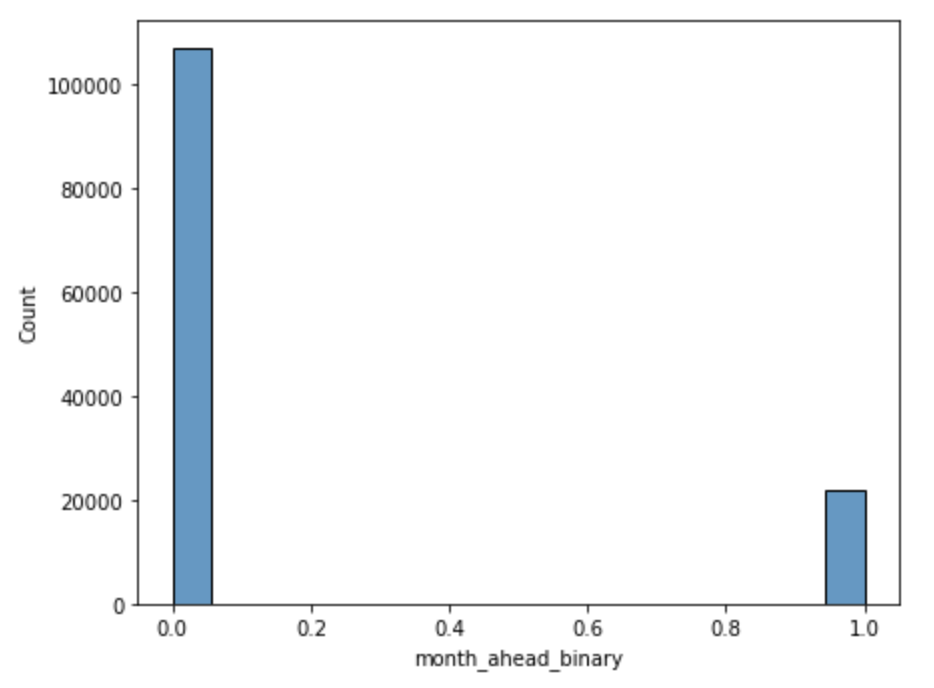

## Initial Model Assessment

Before diving deep into the modeling process, I also did a quick comparison of model performances to decide which three models to focus on. This comparison led me to focus on: **Random Forest Classifier, Bagging Classifier, Gradient Boosting Classifier**


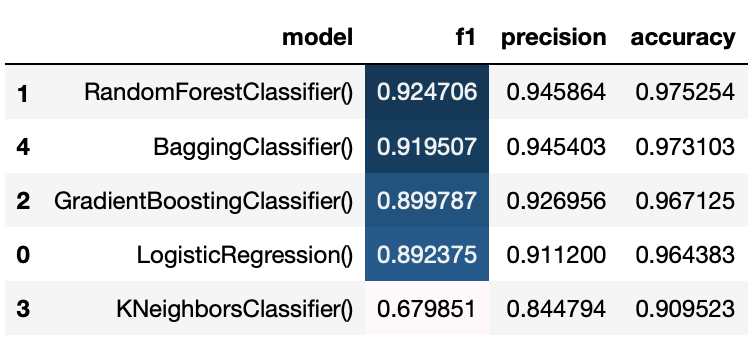

## Model Comparisons

### Random Forest:

**West Coast Dataset:** \
Random Forest Model ROC AUC Score: 0.977\
Random Forest Model Class 1 Recall: 0.79\
Random Forest Model Class 1 F1-Score: 0.86

Random Forest Tuned Model ROC AUC Score: 0.978\
Random Forest Tuned Model Class 1 Recall: 0.79\
Random Forest Tuned Model Class 1 F1-Score: 0.86


**Full Dataset**\
Random Forest Model ROC AUC Score: 0.964\
Random Forest Model Class 1 Recall Score: 0.63\
Random Forest Model Class 1 F1-Score: 0.70


### Bagging:

**West Coast Dataset:** \
Bagging Model ROC AUC Score: 0.951\
Bagging Model Class 1 Recall: 0.77\
Bagging Model Class 1 F1-Score: 0.84

Bagging Tuned Model ROC AUC Score: 0.976\
Bagging Tuned Model Class 1 Recall: 0.79\
Bagging Tuned Model Class 1 F1-Score: 0.85


**Full Dataset**\
Bagging Model ROC AUC Score: 0.923\
Bagging Model Class 1 Recall Score: 0.61\
Bagging Model Class 1 F1-Score: 0.68


### Gradient Boosting:

**West Coast Dataset:** \
Gradient Boosting Model ROC AUC Score: 0.976\
Gradient Boosting Model Class 1 Recall: 0.80\
Gradient Boosting Model Class 1 F1-Score: 0.87

Gradient Boosting Tuned Model ROC AUC Score: 0.977\
Gradient Boosting Tuned Class 1 Recall: 0.80\
Gradient Boosting Tuned Class 1 F1-Score: 0.87


**Full Dataset**\
Gradient Boosting Model ROC AUC Score: 0.977\
Gradient Boosting Model Class 1 Recall Score: 0.65\
Gradient Boosting Model Class 1 F1-Score: 0.71




____

# Final Model Selection

Although all of the models performed relatively well, it seems like the **Gradient Boosting Model** is the best performing model for both the West Coast dataset and the Full dataset. Because the ROC AUC Scores were fairly similar, I considered Recall and F1 scores in my decision. There was no significant improvement in the hyperparameter tuned model, so the final model will be generic. 

**Because the West Coast model was able to obtain a recall of 75% or greater, and the Full model was not, I will go forward with only the West Coast model for the final model and limit any predictions to that region of the United States.**

The final model has an ROC AUC Score of ~0.98 and a Recall Score of 80%. This indicates that **the model was able to correctly predict 80% of the actual high drought counties in the testing dataset.**

### Gradient Boosting Model Classification Report - West Coast Data


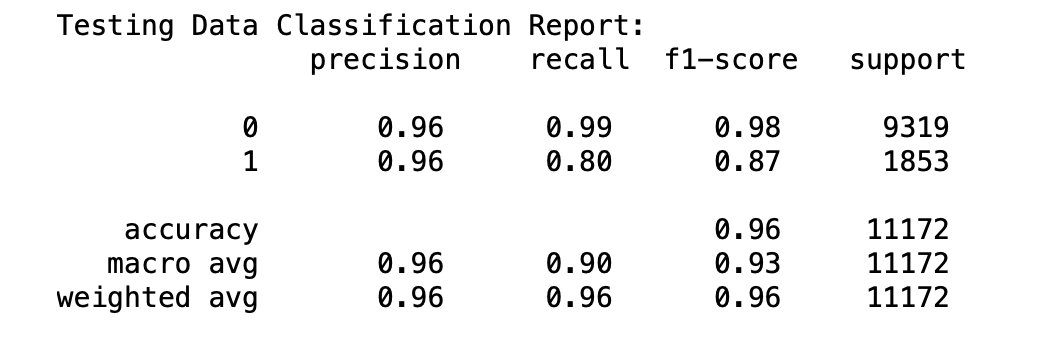

### Gradient Boosting Model Confusion Matrix - West Coast Data

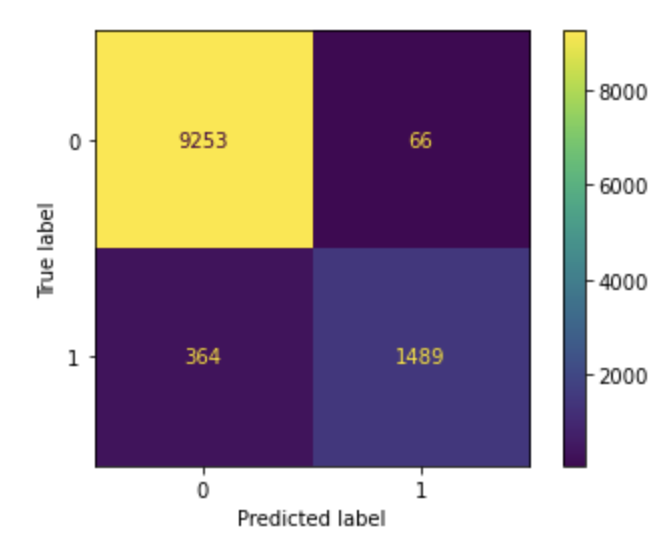

### Gradient Boosting Model ROC Curve - West Coast Data

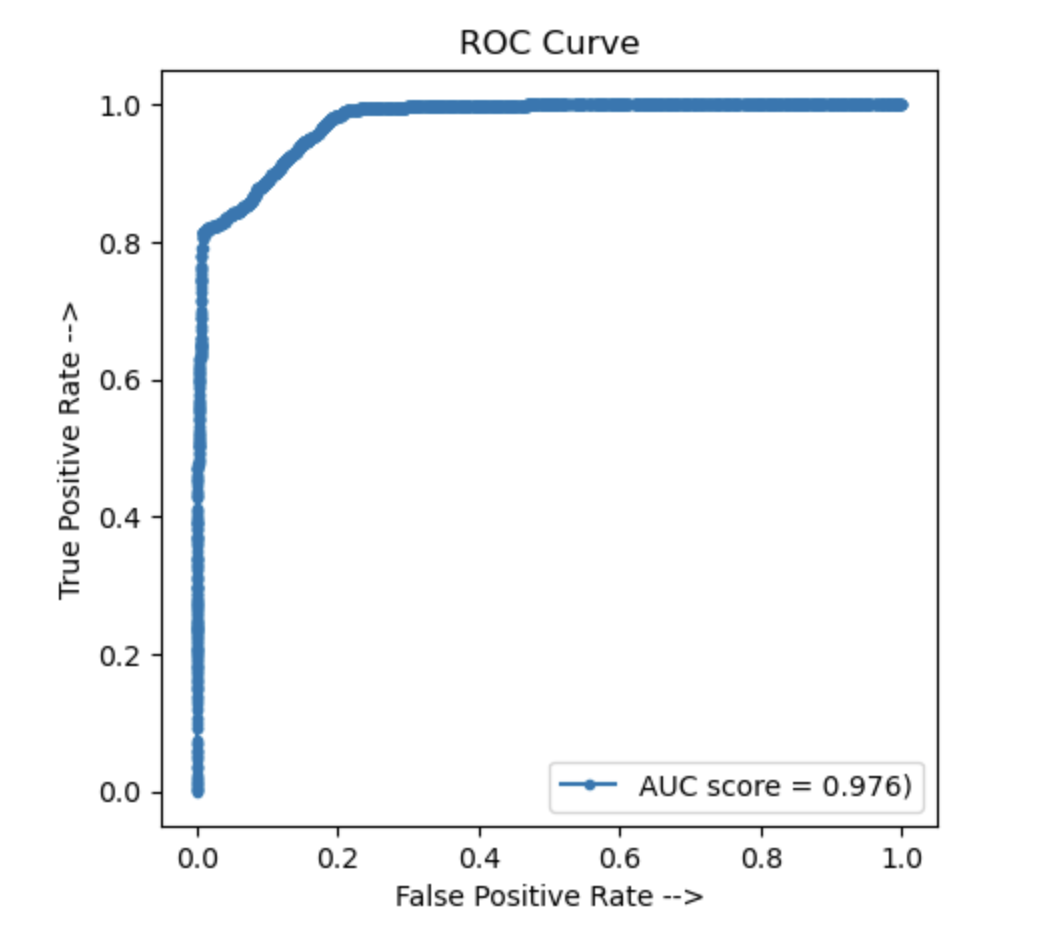

___

# Conclusion and Final Thoughts

Overall this project was very fun and I learned a great deal. I enjoyed developing my feature engineering skills and implementing more custom functions to limit copy/pasting and repetitive actions. I found it fascinating that we could take a time-series problem and approach it as a classification problem with creative feature engineering.

**I believe that the level of accuracy of this model makes it usable by fire management crews for staffing forecasting and introducing fire advisories/restrictions in high risk areas ahead of time.**


### Future Improvements

There is undoubtedly room for improvement on this project, I think the below changes would be worth implementing in the effort to boost model performance:

- Because droughts have gotten worse over time in areas like California, Oregon, and Washington, the model might be limited in its predictive power by the way the training and testing data is split up (chronologically). Since I have removed the time-series component, it could be beneficial to combine the training and testing datasets (which are currently completely seperate) and do a train_test_split on the full dataset so that some of the later observations, with higher drought scores, are included in the training data.
- it is apparent that the dataset is quite umbalanced, with a majority being 'Low Drought', more time could be spent trying to work around this limitation in future iterations of the project.